### Exploratory Data Analysis
---

#### Problem statement
---
##### > Finding protein subsets that distinguish between the classes is the goal.

In [1]:
INPUTDATA="/home/miki/Desktop/Docker/iNeuron/mice-protien-expression/data/raw/Data_Cortex_Nuclear.xlsx"

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Show plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

In [3]:
def import_data(path: str = None, columns: list = None):
    """
    Function to import a dataset into 
    the working environment
    --------------------------------
    Parameter
    ----------
    path : str
    Usually a string with the path of the data
    --------------------------------
    Returns
    -------
    data : dataframe
    Returns a pandas dataframe
     """
    data = pd.read_excel(path)
    if columns:
        data = data.drop(columns, axis = 1)
    return data

In [4]:
col = ['Genotype', 'Treatment', 'Behavior']
df = import_data(INPUTDATA, col)
df.head(3)

/home/miki/Desktop/Docker/iNeuron/mice-protien-expression/mice/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1095 non-null   object 
 1   DYRK1A_N         1092 non-null   float64
 2   ITSN1_N          1092 non-null   float64
 3   BDNF_N           1092 non-null   float64
 4   NR1_N            1092 non-null   float64
 5   NR2A_N           1092 non-null   float64
 6   pAKT_N           1092 non-null   float64
 7   pBRAF_N          1092 non-null   float64
 8   pCAMKII_N        1092 non-null   float64
 9   pCREB_N          1092 non-null   float64
 10  pELK_N           1092 non-null   float64
 11  pERK_N           1092 non-null   float64
 12  pJNK_N           1092 non-null   float64
 13  PKCA_N           1092 non-null   float64
 14  pMEK_N           1092 non-null   float64
 15  pNR1_N           1092 non-null   float64
 16  pNR2A_N          1092 non-null   float64
 17  pNR2B_N       

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1092.0,0.429418,0.249792,0.145327,0.289128,0.368134,0.492861,2.516367
ITSN1_N,1092.0,0.619503,0.251025,0.245359,0.474159,0.568502,0.702111,2.602662
BDNF_N,1092.0,0.319422,0.049246,0.115181,0.288131,0.316923,0.348235,0.497160
NR1_N,1092.0,2.280357,0.373589,0.964543,2.050378,2.291166,2.526946,3.757641
NR2A_N,1092.0,3.822367,0.945597,1.711370,3.129370,3.722900,4.408332,8.482553
...,...,...,...,...,...,...,...,...
SYP_N,1080.0,0.446073,0.066432,0.258626,0.398082,0.448459,0.490773,0.759588
H3AcK18_N,900.0,0.169609,0.059402,0.079691,0.125848,0.158240,0.197876,0.479763
EGR1_N,870.0,0.183135,0.040406,0.105537,0.155121,0.174935,0.204542,0.360692
H3MeK4_N,810.0,0.205440,0.055514,0.101787,0.165143,0.193994,0.235215,0.413903


In [7]:

def null_test(data: pd.DataFrame=None):
    """ 
    A function to fill the Null values with
    the mean of our dataset
    ---------
    Parameters
    param: pandas dataframe
    ----------
    Returns
    a dataframe cleaned of missing values
    -----------
    """
    if data.isnull().any().any():
        data.fillna(data.mean(), inplace=True)
    else:
        print("No missing values encountered")  
    return data

In [8]:
df = null_test(df)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1095 non-null   object 
 1   DYRK1A_N         1095 non-null   float64
 2   ITSN1_N          1095 non-null   float64
 3   BDNF_N           1095 non-null   float64
 4   NR1_N            1095 non-null   float64
 5   NR2A_N           1095 non-null   float64
 6   pAKT_N           1095 non-null   float64
 7   pBRAF_N          1095 non-null   float64
 8   pCAMKII_N        1095 non-null   float64
 9   pCREB_N          1095 non-null   float64
 10  pELK_N           1095 non-null   float64
 11  pERK_N           1095 non-null   float64
 12  pJNK_N           1095 non-null   float64
 13  PKCA_N           1095 non-null   float64
 14  pMEK_N           1095 non-null   float64
 15  pNR1_N           1095 non-null   float64
 16  pNR2A_N          1095 non-null   float64
 17  pNR2B_N       

/tmp/ipykernel_25094/3962116477.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [9]:
df.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
class        0
Length: 79, dtype: int64

In [10]:
# Classes:
# c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
# c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
# c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
# c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

# t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
# t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
# t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
# t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

In [11]:
df.head(5)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m


In [16]:
def label_data(data: pd.DataFrame, col: str = None):
    """
    """
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col])
    return data

In [17]:
d = label_data(df, 'class')

In [18]:
d

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,7
1091,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,7
1092,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,7
1093,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,7


<AxesSubplot: xlabel='class', ylabel='count'>

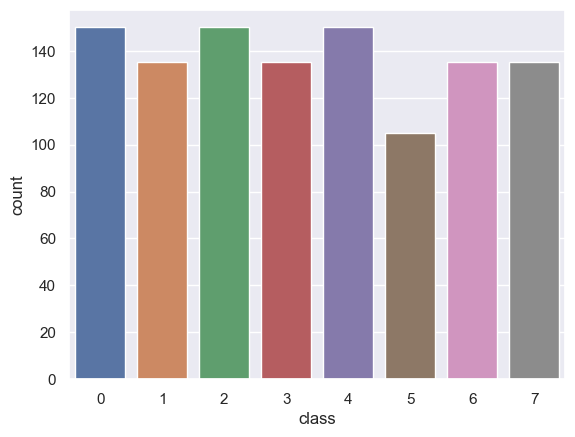

In [23]:
sns.countplot(x=d["class"])

In [ ]:
def balanced_data(data: pd.DataFrame, ):
    """
    function to split our datasets and 
    correct the imbalances of classes o
    bserved in the datasets"""

    from multi_imbalance.resampling.soup import SOUP
    X = data.iloc[: : , -1]
    y = data.iloc[: -1]
    soup = SOUP(maj_int_min={
        'maj': [0, 2, 4], # indices of majority classes
        'min': [1, 3, 5, 6, 7] # indices of minority classes
    })
    X_train, y_train= soup.fit_transform(X, y)
    sns.countplot()